In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from mlutils.plot import *
from mlutils.features import *
from mlutils.models.trees import draw_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()

/home/quick/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Generating a synthetic dataset

In [3]:
# creating a linear space dataset
x = np.linspace(0,1)

In [4]:
# adding random noise
y = x + np.random.uniform(-0.2, 0.2, x.shape)

In [5]:
x.shape

(50,)

In [6]:
# converting to pandas
df_raw = pd.DataFrame(columns=['x','y'])
df_raw.x = x
df_raw.y = y
df_raw.head()

,x,y
0,0.000000,0.017539
1,0.020408,0.210245
2,0.040816,0.226248
3,0.061224,0.163454
4,0.081633,0.001484


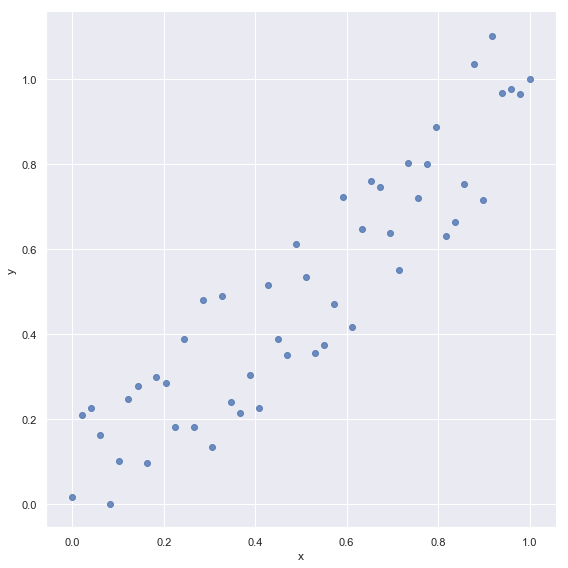

In [7]:
plot_scatter(df_raw, 'x', 'y')

In [8]:
# preprocess and extract dependant variable
df, y, nas = process_dataframe(df_raw, y_fld='y')
df.shape, y.shape, nas

((50, 1), (50,), {})

In [9]:
# do train/val split
x_train, x_val = split_vals(df, 40)
y_train, y_val = split_vals(y, 40)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40, 1), (10, 1), (40,), (10,))

In [10]:
m = RandomForestRegressor().fit(x_train, y_train)

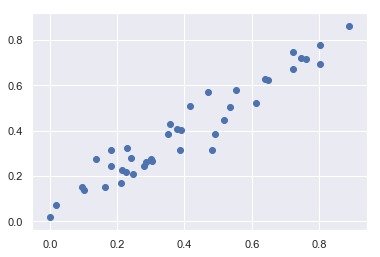

In [11]:
# let's compare predictions agains training data
plt.scatter(y_train, m.predict(x_train));

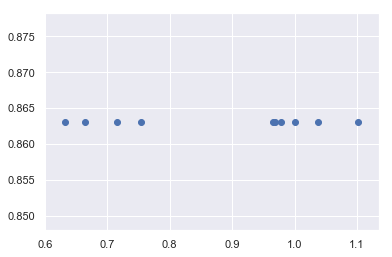

In [12]:
# let's do the same on validation data
plt.scatter(y_val, m.predict(x_val));

In [13]:
m.score(x_val, y_val)

-0.013724698323679174

Interesting right? It's because validation data is completely different from train data as we didn't generate a random sample, but rather split on what is essentially ordered data. As random forests basically split on values and average results in each leaf, the highest prediction possible is the highest value found inside the training data, but that will be only in a single tree. As random forests average their predictions, the actual result will be even lower

In [14]:
y_train.max()

0.8884832381336294

In [15]:
m.predict(x_val).max()

0.8631191207447074

In [16]:
# let's try just one tree so it uses all the data
m = RandomForestRegressor(n_estimators=1).fit(x_train, y_train)

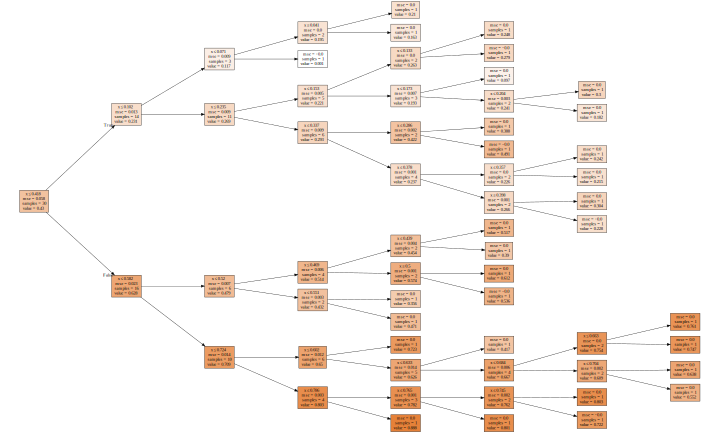

In [17]:
draw_tree(m.estimators_[0],x_train,precision=3)

In [18]:
m.estimators_[0].predict(x_val)

array([0.88848324, 0.88848324, 0.88848324, 0.88848324, 0.88848324,
       0.88848324, 0.88848324, 0.88848324, 0.88848324, 0.88848324])

In [19]:
y_train.max()

0.8884832381336294

Notice how, by using just one tree, all the predictions against the validation data end up being the highest value of y on the training data.

A possible solution is using a GBM that is able to extrapolate better. In this case, we can quickly fix the problem by using a random split of validation data

In [20]:
x_train, x_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=111)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((40, 1), (40,), (10, 1), (10,))

In [21]:
m = RandomForestRegressor().fit(x_train, y_train)

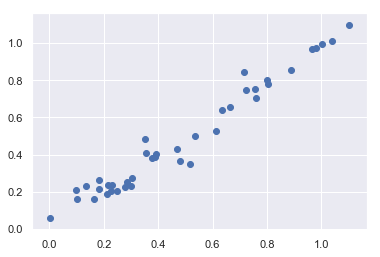

In [22]:
# let's compare predictions agains training data
plt.scatter(y_train, m.predict(x_train));

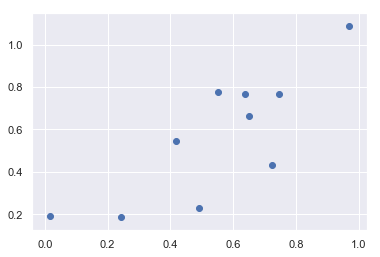

In [23]:
# let's compare predictions agains validation data
plt.scatter(y_val, m.predict(x_val));

In [24]:
# this value will highly depend on the random split above
m.score(x_val, y_val)

0.5669650020174093

In [25]:
# obviously, a linear model would potentially work better here
lm = LinearRegression().fit(x_train, y_train)

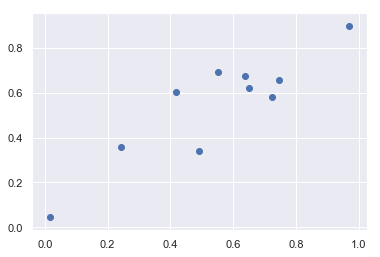

In [26]:
plt.scatter(y_val, lm.predict(x_val));

In [27]:
lm.score(x_val, y_val)

0.8093649907979764